In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [41]:
beere=pd.read_csv('../data/processed/encoder.csv',index_col=0)
beere.head()

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_code
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,2
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,1
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,1
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,2
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,1


In [42]:
beerE_num=beere[['ABV','IBU','Color','Style_code']]

In [43]:
X=beere[['ABV','IBU','Color']]
y=beere['Style_code']

SCALE THE DATA

In [ ]:
# xxxxxxx scale

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [47]:
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=100000)

In [48]:
predictions = model.predict(X_test)
predicions_proba = model.predict_proba(X)
predicions_proba

array([[1.58440228e-02, 1.27129581e-01, 3.43077538e-01, 8.23535387e-05,
        2.54722462e-02, 4.88394259e-01],
       [8.88581270e-02, 5.53536474e-01, 2.18227767e-01, 2.07099229e-03,
        1.12162719e-01, 2.51439202e-02],
       [8.30532301e-02, 5.16583488e-01, 2.59188725e-01, 1.61511039e-03,
        9.98651764e-02, 3.96942707e-02],
       ...,
       [6.23539433e-02, 3.45739556e-01, 3.97722629e-01, 6.63199873e-04,
        4.79465604e-02, 1.45574111e-01],
       [3.85259108e-01, 2.03138196e-01, 2.54799885e-01, 1.33620508e-02,
        8.45123264e-02, 5.89284338e-02],
       [5.91359305e-02, 5.43876203e-01, 1.91653713e-01, 1.36217894e-03,
        1.77134789e-01, 2.68371852e-02]])

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, predictions)

0.5925440751050707

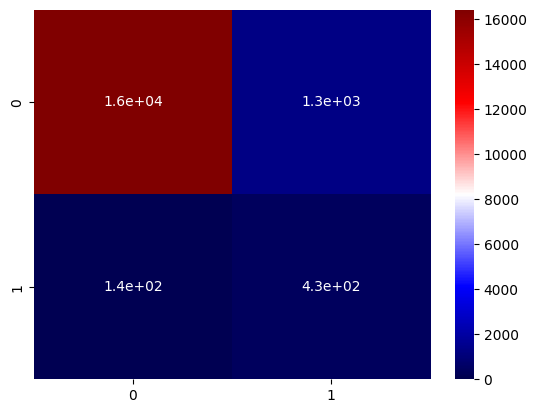

In [50]:
from sklearn.metrics import confusion_matrix
sns.heatmap(multilabel_confusion_matrix(y_test, predictions)[0], annot=True,cmap='seismic',vmin=-1);